In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("titanic.csv")

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [5]:
df.shape

(887, 8)

In [6]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [7]:
df= df.drop(["Name"],axis=1)

In [8]:
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [25]:
df["Survived"].value_counts()

0    545
1    342
Name: Survived, dtype: int64

In [26]:
df["Pclass"].value_counts()

3    487
1    216
2    184
Name: Pclass, dtype: int64

In [27]:
pd.crosstab(df["Pclass"],df["Survived"])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,368,119


In [28]:
df["Sex"].value_counts()

male      573
female    314
Name: Sex, dtype: int64

In [29]:
pd.crosstab(df["Sex"],df["Survived"])

Survived,0,1
Sex,,
female,81,233
male,464,109


In [30]:
df["Age"].value_counts()

22.00    39
28.00    37
18.00    36
21.00    34
24.00    34
         ..
0.92      1
23.50     1
36.50     1
55.50     1
74.00     1
Name: Age, Length: 89, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='Age'>

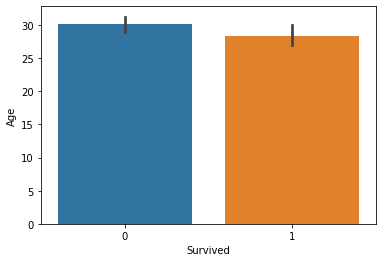

In [32]:
sns.barplot(x="Survived",y="Age",data=df)

In [33]:
df["Fare"].value_counts()

8.0500     43
13.0000    42
7.8958     36
7.7500     33
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

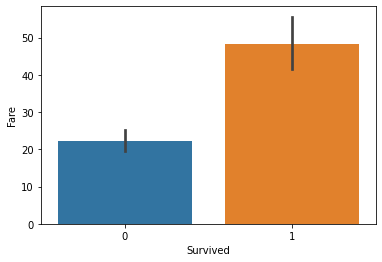

In [34]:
sns.barplot(x="Survived",y="Fare",data=df)

In [35]:
df["Siblings/Spouses Aboard"].value_counts()

0    604
1    209
2     28
4     18
3     16
8      7
5      5
Name: Siblings/Spouses Aboard, dtype: int64

In [36]:
pd.crosstab(df["Siblings/Spouses Aboard"],df["Survived"])

Survived,0,1
Siblings/Spouses Aboard,,
0,394,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [39]:
df["Parents/Children Aboard"].value_counts()

0    674
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parents/Children Aboard, dtype: int64

In [40]:
pd.crosstab(df["Parents/Children Aboard"],df["Survived"])

Survived,0,1
Parents/Children Aboard,,
0,441,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [42]:
df = pd.get_dummies(df,drop_first=True)

In [43]:
df.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [44]:
x=df.drop("Survived",axis=1)
y=df[["Survived"]]

In [45]:
x.head()

,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0
2,3,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,0
4,3,35.0,0,0,8.0500,1


In [46]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [49]:
X_train.shape

(709, 6)

In [50]:
X_test.shape

(178, 6)

In [51]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [52]:
model1 = GaussianNB()

In [53]:
model1.fit(X_train,y_train)

C:\Users\Madhuri\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [54]:
ypred1 = model1.predict(X_test)

In [55]:
ypred1

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0], dtype=int64)

In [56]:
y_test

,Survived
433,0
399,0
244,0
492,0
607,0
...,...
542,0
778,0
83,1
161,0


In [58]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report

In [59]:
accuracy_score(y_test,ypred1)

0.7584269662921348

In [60]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier

In [61]:
# KNN without scaling 
model2 = KNeighborsClassifier(n_neighbors=5)

In [62]:
model2.fit(X_train, y_train)

C:\Users\Madhuri\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [63]:
ypred2 = model2.predict(X_test)

In [64]:
accuracy_score(y_test,ypred2)

0.6685393258426966

In [65]:
# KNN with scaling 
from sklearn.preprocessing import StandardScaler

In [66]:
scalar = StandardScaler()

In [67]:
X_train_s = scalar.fit_transform(X_train)
X_test_s = scalar.transform(X_test)

In [68]:
model2 = KNeighborsClassifier()

In [69]:
model2.fit(X_train_s,y_train)

C:\Users\Madhuri\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [71]:
ypred2 = model2.predict(X_test_s)

In [72]:
accuracy_score(y_test,ypred2)

0.7921348314606742

In [ ]:
# Thus, KNN with scaling has the best accuracy. 